## News Mood

The VADER program is being used to run the sentiment analysis on various news sources' last 100 Twitter messages. 

At the time of analysis, the sentiment analysis shows BBC and CBS scored unusually higher than CNN, Fox News, and New York Times. It is due to the fact that BBC and CBS coverages were mainly on Emmy Awards topics while CNN, Fox News, and New York Times were covering UN Convention and natural disaster in Mexico and Puerto Rico. 

Interestingly enough, Fox News' compound score is nearly 0. This shows that Fox News has covered all topics - perhaps on superficial level. 

In [6]:
# Dependencies
import tweepy
import json
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET
consumer_key = CONSUMER_KEY 
consumer_secret = CONSUMER_SECRET 
access_token = ACCESS_TOKEN 
access_token_secret = ACCESS_TOKEN_SECRET

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Target User Accounts
target_user = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes")
sentiments = []
counter = 1

# Loop through each user
for user in target_user:

    # Variables for holding sentiments
    user_list = []
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 10 pages of tweets (total 200 tweets)
    for x in range(10):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x+1)

        # Loop through all tweets
        for tweet in public_tweets:
            
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
            
            # Add each value to the appropriate array
            sentiments.append({"News": user,
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neg,
                               "Neutral": neu,
                               "Tweets Ago": counter})
            
            counter += 1

In [2]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd = sentiments_pd[["News", "Compound", "Positive", "Negative", "Neutral", "Tweets Ago"]]
sentiments_pd = sentiments_pd.sort_values(["Tweets Ago"], ascending = False).reset_index(drop=True)
sentiments_pd.head()

,News,Compound,Positive,Negative,Neutral,Tweets Ago
0,@NYTimes,0.6115,0.250,0.000,0.750,1000
1,@NYTimes,0.4215,0.157,0.000,0.843,999
2,@NYTimes,0.0000,0.000,0.000,1.000,998
3,@NYTimes,-0.6249,0.000,0.186,0.814,997
4,@NYTimes,-0.2500,0.000,0.100,0.900,996


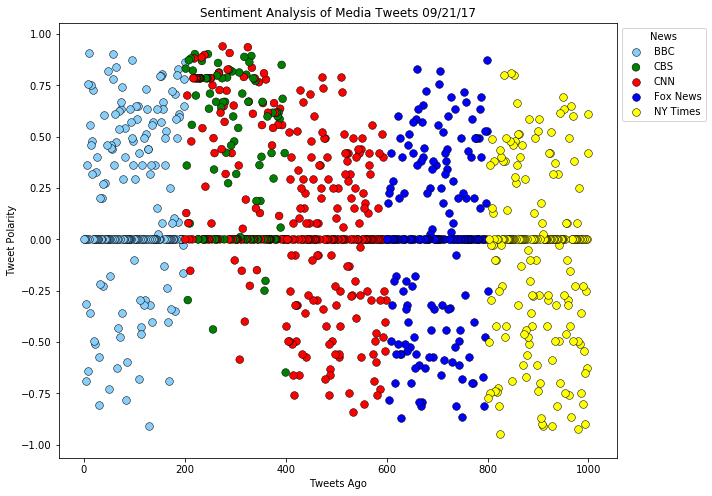

In [3]:
# Scatter Plot for Sentiment Analysis of Media Tweets
plt.figure(figsize=(10, 8))

plt.title("Sentiment Analysis of Media Tweets %s" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

bbc_plot = plt.scatter(sentiments_pd["Tweets Ago"].loc[sentiments_pd["News"]=="@BBC"],
                      sentiments_pd["Compound"].loc[sentiments_pd["News"]=="@BBC"],
                      c="lightskyblue", label="BBC", alpha=1, linewidths=0.5, edgecolor="black", s=60)

cbs_plot = plt.scatter(sentiments_pd["Tweets Ago"].loc[sentiments_pd["News"]=="@CBS"],
                      sentiments_pd["Compound"].loc[sentiments_pd["News"]=="@CBS"],
                      c="gr", label="CBS", alpha=1, linewidths=0.5, edgecolor="black", s=60)

cnn_plot = plt.scatter(sentiments_pd["Tweets Ago"].loc[sentiments_pd["News"]=="@CNN"],
                      sentiments_pd["Compound"].loc[sentiments_pd["News"]=="@CNN"],
                      c="red", label="CNN", alpha=1, linewidths=0.5, edgecolor="black", s=60)

fox_plot = plt.scatter(sentiments_pd["Tweets Ago"].loc[sentiments_pd["News"]=="@FoxNews"],
                      sentiments_pd["Compound"].loc[sentiments_pd["News"]=="@FoxNews"],
                      c="blue", label="FoxNews", alpha=1, linewidths=0.5, edgecolor="black", s=60)

nyt_plot = plt.scatter(sentiments_pd["Tweets Ago"].loc[sentiments_pd["News"]=="@NYTimes"],
                      sentiments_pd["Compound"].loc[sentiments_pd["News"]=="@NYTimes"],
                      c="yellow", label="NYTimes", alpha=1, linewidths=0.5, edgecolor="black", s=60)

plt.legend((bbc_plot, cbs_plot, cnn_plot, fox_plot, nyt_plot),
           ("BBC","CBS","CNN","Fox News","NY Times"),title="News", bbox_to_anchor=(1, 1))

plt.show()

In [4]:
sentiments_avg = sentiments_pd.groupby(["News"], as_index=False).mean()
sentiments_avg.drop(['Tweets Ago', 'Positive', 'Negative', 'Neutral'], axis=1, inplace=True)
sentiments_avg

,News,Compound
0,@BBC,0.147897
1,@CBS,0.371114
2,@CNN,-0.013207
3,@FoxNews,-0.000425
4,@NYTimes,-0.077993


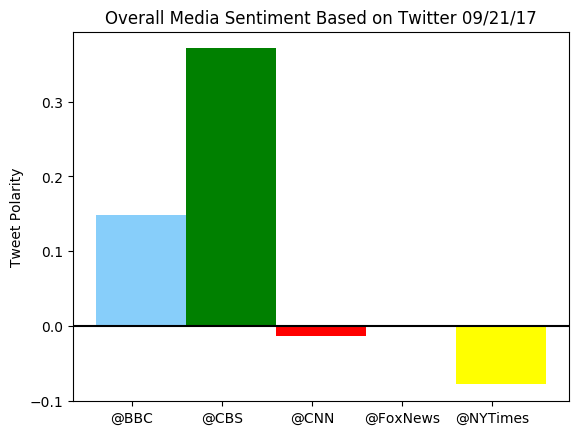

In [5]:
#Bar Plot for Overall Media Sentiment Based on Twitter
plt.rcdefaults()
fig, ax = plt.subplots()

news = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes"]
colors = ['lightskyblue', 'green', 'red', 'blue', 'yellow']
compound_bar = []
y = 0 

for x in sentiments_avg.iterrows():
    compound_bar.append(sentiments_avg['Compound'][y])
    y += 1

x_axis = np.arange(len(compound_bar))
plt.bar(x_axis, compound_bar, color=colors, align="edge", width=1)

tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, news)

ax.set_ylabel("Tweet Polarity")
ax.set_title("Overall Media Sentiment Based on Twitter %s" % (time.strftime("%x")))
ax.set_xticklabels(sentiments_avg['News'])

plt.axhline(0, color='black')

plt.show()